# Adapter

It allows objects with incompatible interfaces to be useble.

The basic parts:
- adaptee: to be adapted to be used in the targeted system (eg. existing library, third part work...)
- target: the usable system for the client, the adaptee are to be adapted to this.
- adapter: the connecting part from adaptee to target, that be wued by client

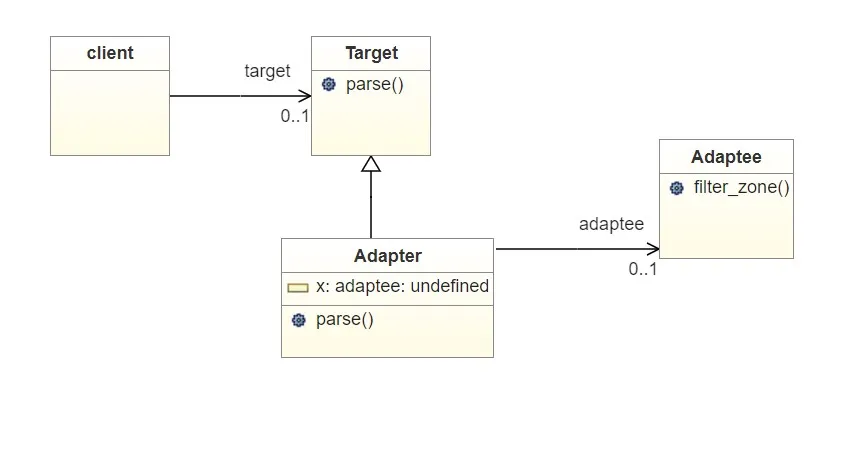

## Simple Implementation

In [14]:
# adaptee
import random
# this is the part we can't change
class FahrenheitTemperature:
    def __init__(self):
        self.temperature = random.randint(32, 500)

    def get_temperature_fahrenheit(self):
        return self.temperature

In [15]:
# target (not used but used as reference)
class CelsiusTemperature:
    def __init__(self, temperature):
        self.temperature = temperature

    def get_temperature_celcius(self):
        return self.temperature

# adapter
class FahrenheitToCelsiusAdapter(CelsiusTemperature):
    def __init__(self):
        self.fahrenheit_temp = FahrenheitTemperature()

    def get_temperature_celcius(self):
        fahrenheit_temp = self.fahrenheit_temp.get_temperature_fahrenheit()
        celsius_temp = (fahrenheit_temp - 32) * 5 / 9
        return celsius_temp

class Thermometer:
    def __call__(self):
        print(f"The temperature is {FahrenheitToCelsiusAdapter().get_temperature_celcius():.4f} degree.")

In [16]:
thermometer = Thermometer()
thermometer()

The temperature is 206.6667 degree.


## Adapter

In [25]:
# drawing lib
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Line:
    def __init__(self, start:Point, end:Point):
        self.start = start
        self.end = end

class Object(object):
    @staticmethod
    def begin():
        pass
    def end():
        pass

class Rect(Object):
    def __init__(self, x, y, w, h):
        self.lines = []
        self.lines.append(Line(Point(x, y), Point(x+w, y)))
        self.lines.append(Line(Point(x+w, y), Point(x+w, y+h)))
        self.lines.append(Line(Point(x, y), Point(x, y+h)))
        self.lines.append(Line(Point(x, y+h), Point(x+w, y+h)))
    def __call__(self):
        return self.lines
    def __item__(self, i):
         return self.lines(i)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
# target
class Canvas:
    def __init__(self, w, h):
        self.width = w
        self.height = h
        self.canvas = np.zeros(w*h)
    def set_pixel(self, x, y, color):
        self.canvas[y*self.width+x] = color
    def render(self):
        plt.imshow(self.canvas.reshape(self.width, self.height), cmap='gray')

In [34]:
# adapter

class Line2PointAdapter:
    def __init__(self, line):
        self.points = []
        left = min(line.start.x, line.end.x)
        right = max(line.start.x, line.end.x)
        top = min(line.start.y, line.end.y)
        bottom = max(line.start.y, line.end.y)

        dx = right - left
        dy = bottom - top

        if dx == 0:
            for y in range(top, bottom+1):
                self.points.append(Point(left, y))
        elif dy == 0:
            for x in range(left, right+1):
                self.points.append(Point(x, top))

    def __call__(self):
        return self.points
    def __item__(self, i):
        return self.points[i]

In [35]:
def draw_points(canvas, points):
    for p in points:
        canvas.set_pixel(p.x, p.y, 1)

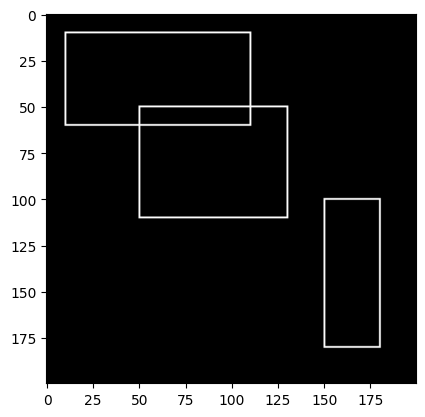

In [46]:
rects = []
rects.append(Rect(10, 10, 100, 50))
rects.append(Rect(50, 50, 80, 60))
rects.append(Rect(150, 100, 30, 80))

canvas = Canvas(200, 200)

for rect in rects:
    for line in rect():
        l2p = Line2PointAdapter(line)
        draw_points(canvas, l2p())
canvas.render()